In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv('C:/Users/maria/Desktop/ml project/metaverse_transactions_dataset.csv')
data

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


In [3]:
data.shape
data.columns
data.info()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600

In [4]:
data=data.drop(['sending_address', 'receiving_address','ip_prefix'],axis=1)
data.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk


In [5]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data['timestamp'].sort_values()
data=data.sort_values('timestamp')
data=data.reset_index()
data=data.drop('index',axis=1)
data

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,6,84,high_value,veteran,49.6125,low_risk
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,3,70,focused,established,25.3125,low_risk
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,5,54,focused,established,20.2500,low_risk
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,4,62,focused,established,35.4375,low_risk
4,2022-01-01 00:36:27,0,353.949174,sale,South America,7,94,high_value,veteran,70.8750,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-12-31 23:25:21,23,239.989984,transfer,South America,1,31,random,new,25.0000,low_risk
78596,2022-12-31 23:36:26,23,418.844574,transfer,North America,6,139,high_value,veteran,36.7500,low_risk
78597,2022-12-31 23:41:28,23,391.235270,transfer,Europe,8,88,high_value,veteran,36.7500,low_risk
78598,2022-12-31 23:46:47,23,542.983002,sale,Africa,7,112,high_value,veteran,52.5000,low_risk


In [6]:
data["transaction_type"].unique()
data["location_region"].unique()
data["hour_of_day"].unique()
data["purchase_pattern"].unique()
data["age_group"].unique()

array(['veteran', 'established', 'new'], dtype=object)

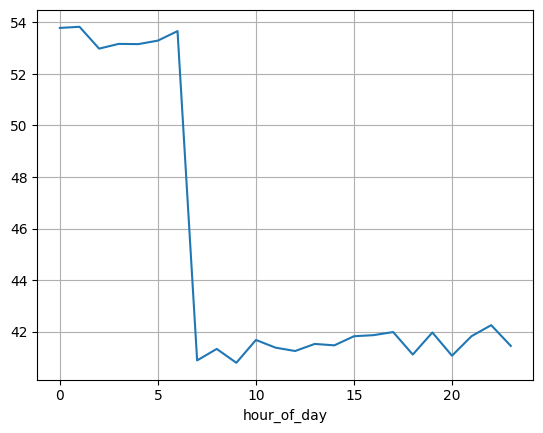

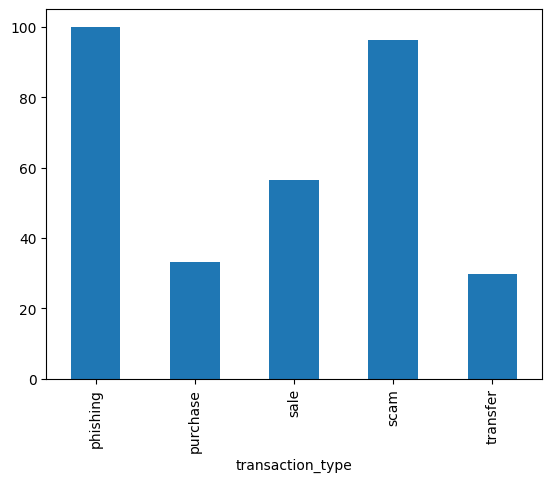

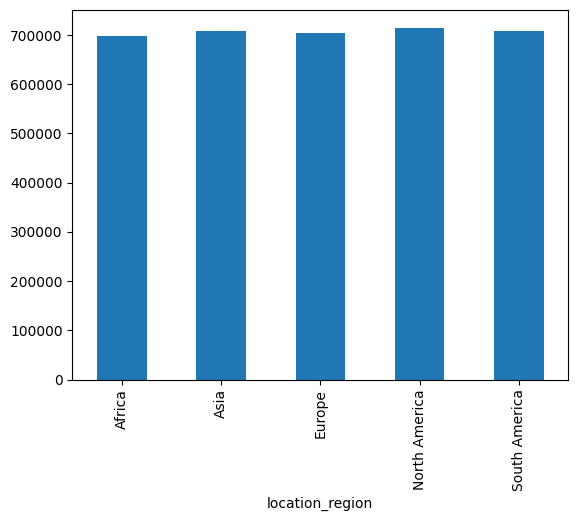

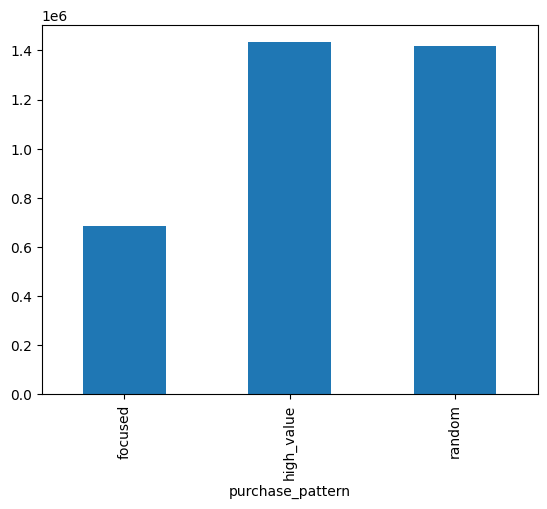

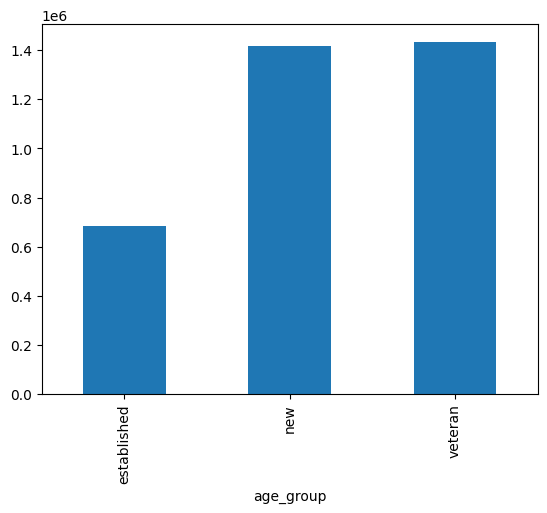

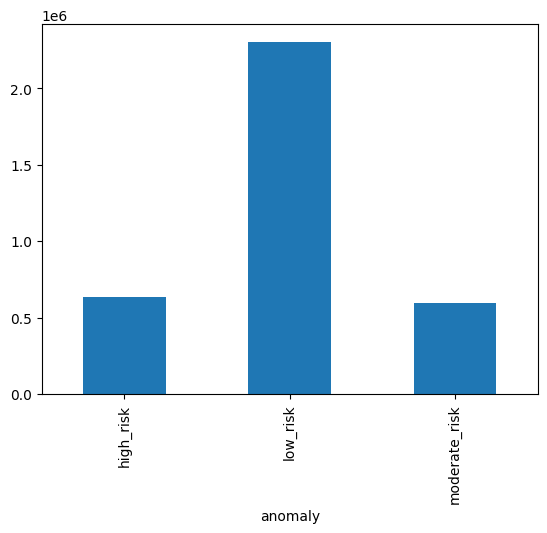

In [7]:

data.groupby('hour_of_day')['risk_score'].mean().plot(kind='line')
plt.grid()
plt.show()
data.groupby('transaction_type')['risk_score'].mean().plot(kind='bar')
plt.show()
data.groupby('location_region')['risk_score'].sum().plot(kind='bar')
plt.show()
data.groupby('purchase_pattern')['risk_score'].sum().plot(kind='bar')
plt.show()
data.groupby('age_group')['risk_score'].sum().plot(kind='bar')
plt.show()
data.groupby('anomaly')['risk_score'].sum().plot(kind='bar')
plt.show()

In [8]:
label_encoder = LabelEncoder()
data["purchase_pattern"] = label_encoder.fit_transform(data["purchase_pattern"])
data["age_group"] = label_encoder.fit_transform(data["age_group"])


In [10]:
import pandas as pd

# Assuming 'data' is your original DataFrame containing both features and target variable
# Extracting features into 'x' and target variable into 'y'
y = data['anomaly']
x = data[['hour_of_day', 'amount', 'transaction_type', 'location_region', 'login_frequency', 'session_duration', 'purchase_pattern', 'age_group', 'risk_score']]

# One-hot encoding categorical variables in 'x'
x = pd.get_dummies(x, columns=['transaction_type', 'location_region'], drop_first=True, dtype=int)

# Replace categorical labels in 'y' with numerical values
y = y.replace({'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2})

# Display the head of the modified 'x' DataFrame
print(x.head())

# Display the modified 'y' Series
print(y.head())



   hour_of_day      amount  login_frequency  session_duration  \
0            0  592.024530                6                84   
1            0  755.500717                3                70   
2            0  247.716361                5                54   
3            0  422.789709                4                62   
4            0  353.949174                7                94   

   purchase_pattern  age_group  risk_score  transaction_type_purchase  \
0                 1          2     49.6125                          0   
1                 0          0     25.3125                          0   
2                 0          0     20.2500                          0   
3                 0          0     35.4375                          1   
4                 1          2     70.8750                          0   

   transaction_type_sale  transaction_type_scam  transaction_type_transfer  \
0                      0                      0                          1   
1             

C:\Users\maria\AppData\Local\Temp\ipykernel_11992\1067289369.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2})


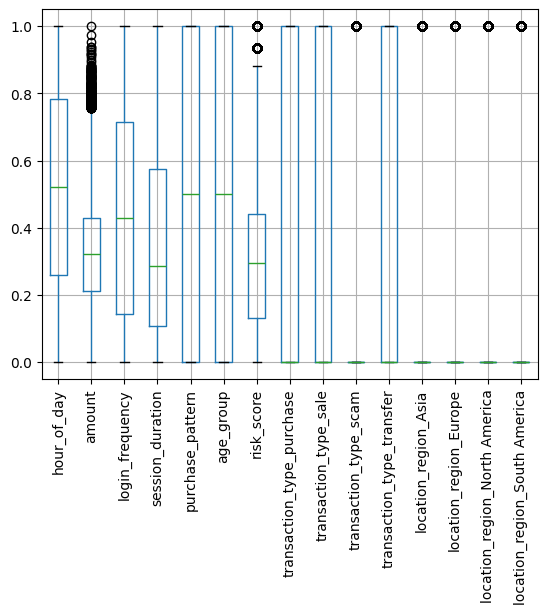

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

mmax = MinMaxScaler()

# Assuming x is a pandas DataFrame
columns_to_scale = [
    'hour_of_day', 'amount', 'login_frequency', 'session_duration',
    'purchase_pattern', 'age_group', 'risk_score',
    'transaction_type_purchase', 'transaction_type_sale',
    'transaction_type_scam', 'transaction_type_transfer',
    'location_region_Asia', 'location_region_Europe',
    'location_region_North America', 'location_region_South America'
]

x[columns_to_scale] = mmax.fit_transform(x[columns_to_scale])

x.boxplot()
plt.xticks(rotation=90)
plt.show()


In [12]:
print(x.columns)


Index(['hour_of_day', 'amount', 'login_frequency', 'session_duration',
       'purchase_pattern', 'age_group', 'risk_score',
       'transaction_type_purchase', 'transaction_type_sale',
       'transaction_type_scam', 'transaction_type_transfer',
       'location_region_Asia', 'location_region_Europe',
       'location_region_North America', 'location_region_South America'],
      dtype='object')


In [16]:
data


,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,6,84,1,2,49.6125,low_risk
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,3,70,0,0,25.3125,low_risk
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,5,54,0,0,20.2500,low_risk
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,4,62,0,0,35.4375,low_risk
4,2022-01-01 00:36:27,0,353.949174,sale,South America,7,94,1,2,70.8750,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-12-31 23:25:21,23,239.989984,transfer,South America,1,31,2,1,25.0000,low_risk
78596,2022-12-31 23:36:26,23,418.844574,transfer,North America,6,139,1,2,36.7500,low_risk
78597,2022-12-31 23:41:28,23,391.235270,transfer,Europe,8,88,1,2,36.7500,low_risk
78598,2022-12-31 23:46:47,23,542.983002,sale,Africa,7,112,1,2,52.5000,low_risk


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         78600 non-null  datetime64[ns]
 1   hour_of_day       78600 non-null  int64         
 2   amount            78600 non-null  float64       
 3   transaction_type  78600 non-null  object        
 4   location_region   78600 non-null  object        
 5   login_frequency   78600 non-null  int64         
 6   session_duration  78600 non-null  int64         
 7   purchase_pattern  78600 non-null  int32         
 8   age_group         78600 non-null  int32         
 9   risk_score        78600 non-null  float64       
 10  anomaly           78600 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(3)
memory usage: 6.0+ MB


In [19]:
# Convertir le DataFrame en fichier CSV
data.to_csv('metaverse_transactions_dataset.csv', index=False)